Serial Time: 27.269742s
Parallel Time: 1.196156s


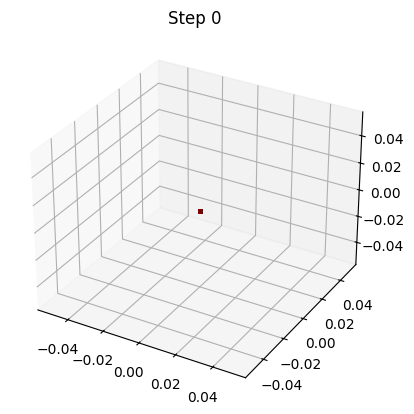

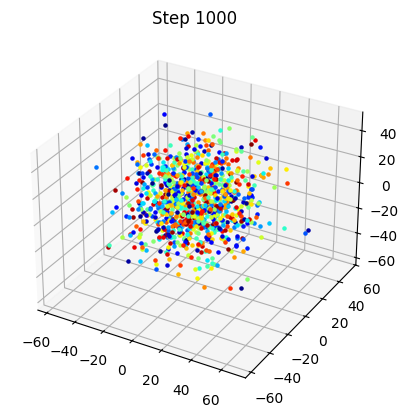

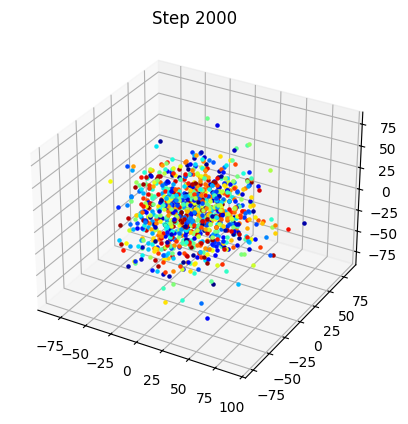

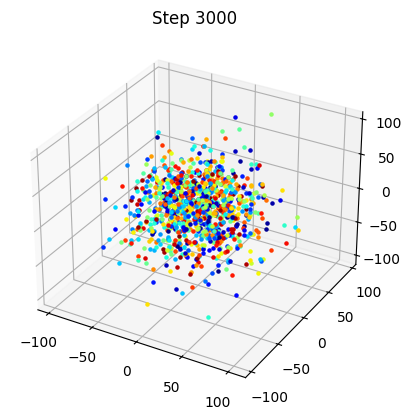

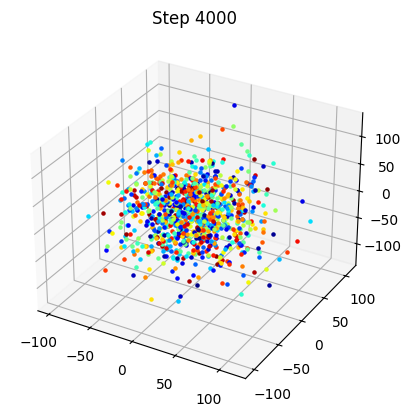

array([[ 21.28337863, -35.30877465, -30.42408574],
       [  7.98160345, -48.98999972,  -3.62338718],
       [-32.33459837,  28.46240266,   7.30297487],
       ...,
       [  4.72312493,  87.20839498, -61.62336866],
       [  6.08953319,  19.51557987, -40.63840333],
       [  2.19478811,  22.09344417,  39.81916204]])

In [1]:
"""
# 3D Random Walk Simulation 
---------------------------

Este código implementa una simulación de caminata aleatoria en tres dimensiones para un número de partículas definido. Cada partícula se desplaza aleatoriamente en las tres direcciones del espacio, y su posición se actualiza en cada paso.

Usos:
- Modelado de fenómenos estocásticos, como difusión y transporte de partículas.

Visualización:
- En la versión secuencial, se puede habilitar la visualización en 3D de las posiciones de las partículas en intervalos definidos.

> https://es.wikipedia.org/wiki/Camino_aleatorio
"""

from numba import njit, prange
import matplotlib.pyplot as plt
import numpy as np
import time

PARTICLE_COUNT = 1_000
STEPS = 5_000
WRITE_FREQUENCY = 1_000


def random_walk_3D_serial(n_steps: int, n_particles: int, enable_plot: bool = False):
    positions = np.zeros((n_particles, 3))  # (x, y, z) for each particle
    colors = plt.cm.jet(np.linspace(0, 1, n_particles))

    for i in range(n_steps):
        if i % WRITE_FREQUENCY == 0 and enable_plot:
            plt.figure()
            ax = plt.axes(projection="3d")

            for j in range(n_particles):
                ax.scatter(
                    positions[j, 0],
                    positions[j, 1],
                    positions[j, 2],
                    color=colors[j],
                    s=5,
                )

            plt.title(f"Step {i}")
            plt.show()

        for j in range(n_particles):
            positions[j, 0] += np.random.uniform(-1, 1)  # x
            positions[j, 1] += np.random.uniform(-1, 1)  # y
            positions[j, 2] += np.random.uniform(-1, 1)  # z

    return positions


@njit(parallel=True)
def random_walk_3D_parallel(n_steps: int, n_particles: int):
    positions = np.zeros((n_particles, 3))  # (x, y, z) for each particle

    for i in range(n_steps):
        for j in prange(n_particles):
            positions[j, 0] += np.random.uniform(-1, 1)  # x
            positions[j, 1] += np.random.uniform(-1, 1)  # y
            positions[j, 2] += np.random.uniform(-1, 1)  # z

    return positions


serial_start = time.perf_counter()
random_walk_3D_serial(STEPS, PARTICLE_COUNT, enable_plot=False)
serial_end = time.perf_counter()
print(f"Serial Time: {serial_end - serial_start:.6f}s")

parallel_start = time.perf_counter()
random_walk_3D_parallel(STEPS, PARTICLE_COUNT)
parallel_end = time.perf_counter()
print(f"Parallel Time: {parallel_end - parallel_start:.6f}s")

random_walk_3D_serial(
    STEPS, PARTICLE_COUNT, enable_plot=True
)  # Call again for visualization purposes only as particles will be different